Привет! Ты теперь находишься на территории код-ревьюеров. У нас тут своя атмосфера и правила:  
1. Меня зовут Алексей Свирин.  
2. Общаемся на ты.  
3. Хочешь мне написать — пиши. Только нужно выбрать свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку, но все остальное как в жизни, может быть сложно.  
5. У тебя бесконечное количество ~~жизней~~ попыток для сдачи проекта.  
6. Поехали!  


---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера №1

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

<div class="alert alert-block alert-info">
    

### Комментарий от ревьюера №1

У тебя очень классный проект. Он сделан совершенно верно, у него хорошее оформление и выводы. Мне очень понравилась функция display_side_by_side, сделана отлично и интересно. Продолжай в том же духе! Проект принят.
</div>

## Аналитика в авиакомпании

В исследовании проанализированы данные авиакомпании по датафреймам:

    1. Количество рейсов по моделям самолетов в сентябре 2018 года (/datasets/query_1.csv)
    2. Среднее количество рейсов, прибывающих в города за день в августе 2018 года - (/datasets/query_3.csv)
    
Результатом является вывод полученный в ходе исследования графиков.

    
### Содержание исследования
_____

##### Подготовка:
* <a href="#step_1">1. Изучение файлов с данными, получение общей информации, загрузка библиотек.</a>
* <a href="#step_2">2. Предобработка данных.</a>

##### Анализ данных:
* <a href="#step_3">3. Анализ данных (построение графиков, описание).</a>

##### Итог:
* <a href="#step_4">4. Общий вывод.</a>

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Хорошее начало.
</div>

<a id='step_1'></a>
### 1. Изучение файлов с данными, получение общей информации, загрузка библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#Глобально снял ограничение на кол-во выводов для каждой ячейки ввода кода.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Включил возможность форматировать стили текста с помощью метода printmd()
from IPython.display import Markdown, display, HTML
def printmd(string):
    display(Markdown(string))
    
#Снял ограничение на вывод кол-ва столбцов и ширины колонки.
pd.set_option('display.max_columns', None)
try:
    pd.set_option('display.max_colwidth', None)
except:
    pd.set_option('display.max_colwidth', -1)
    
#Добавил функцию вывода таблиц в одну строку, для экономии пространства и улучшения восприятия информации.
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

#Сформировал датафреймы из csv файлов сразу отсеяв дубликапты.
aircrafts = pd.read_csv('/datasets/query_1.csv').drop_duplicates().reset_index(drop = True)
arrival_flights = pd.read_csv('/datasets/query_3.csv').drop_duplicates().reset_index(drop = True)

display_side_by_side(
    [aircrafts.head(10),arrival_flights.head(10)], 
    ['Кол-во рейсов по моделям самолетов', 'Среднее кол-во прибывающих рейсов в города']
)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185
,city,average_flights
0,Абакан,3.87097


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Крутой вывод двух таблиц рядом друг с другом.
</div>

In [2]:
#Вывел уникальные значения столбцов, для проверки корректности данных. 
#Применил try except для обхода ошибок сортировки. Сортировал значения там, где это возможно.
def check_unique(df):
    a = []
    for column in df.columns:
        print(column,':')
        try:
            a = df[column].unique()
            a.sort()
        except:
            print(a)
        else:
            print(a)
        print()

printmd('**Кол-во рейсов по моделям самолетов:**')
aircrafts.info()
print()
check_unique(aircrafts)
print()
print()
printmd('**Среднее кол-во прибывающих рейсов в города:**')
arrival_flights.info()
print()
check_unique(arrival_flights)

**Кол-во рейсов по моделям самолетов:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes

model :
['Airbus A319-100' 'Airbus A321-200' 'Boeing 737-300' 'Boeing 767-300'
 'Boeing 777-300' 'Bombardier CRJ-200' 'Cessna 208 Caravan'
 'Sukhoi SuperJet-100']

flights_amount :
[ 300  600  607  630  960 4185 4446 4557]





**Среднее кол-во прибывающих рейсов в города:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB

city :
['Абакан' 'Анадырь' 'Анапа' 'Архангельск' 'Астрахань' 'Барнаул' 'Белгород'
 'Белоярский' 'Благовещенск' 'Братск' 'Брянск' 'Бугульма' 'Владивосток'
 'Владикавказ' 'Волгоград' 'Воркута' 'Воронеж' 'Геленджик' 'Горно-Алтайск'
 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Йошкар-Ола'
 'Казань' 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Когалым'
 'Комсомольск-на-Амуре' 'Краснодар' 'Красноярск' 'Курган' 'Курск' 'Кызыл'
 'Липецк' 'Магадан' 'Магнитогорск' 'Махачкала' 'Минеральные Воды' 'Мирный'
 'Москва' 'Мурманск' 'Надым' 'Нальчик' 'Нарьян-Мар' 'Нерюнгри'
 'Нефтеюганск' 'Нижневартовск' 'Нижнекамск' 'Нижний Новгород'
 'Новокузнецк' 'Новосибирск' 'Новый Уренгой' 'Норильск' 'Ноябрьск'
 'Нягань' 'Омск' 'Оренбург' 'Орск' 'Пенза' 'Пермь' 'Петрозаводск

### Вывод

Типы данных колонки `average_flights` в таблице arrival_flights можно поменять на int64 предварительно округлив.

<a id='step_2'></a>
### 2. Предобработка данных:

In [8]:
#Округлил данные в колонке `average_flights`, а так же привел тип к int64.
arrival_flights['average_flights'] = arrival_flights['average_flights'].apply(lambda x: round(x)).astype('int64')

In [25]:
#Создал датафрейм с топ 10 городов по среднему количеству прибывших рейсов.
arr_flights_top = arrival_flights.sort_values('average_flights',ascending=False)[:10]
arr_flights_top.head(20)

,city,average_flights
43,Москва,130
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,12
20,Екатеринбург,11
67,Ростов-на-Дону,10
74,Сочи,10
84,Ульяновск,10
63,Пермь,10
10,Брянск,10


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера №1

Хорошо, что сразу округлил данные в таблице.
</div>

<a id='step_3'></a>
### 3. Анализ данных (построение графиков, описание):

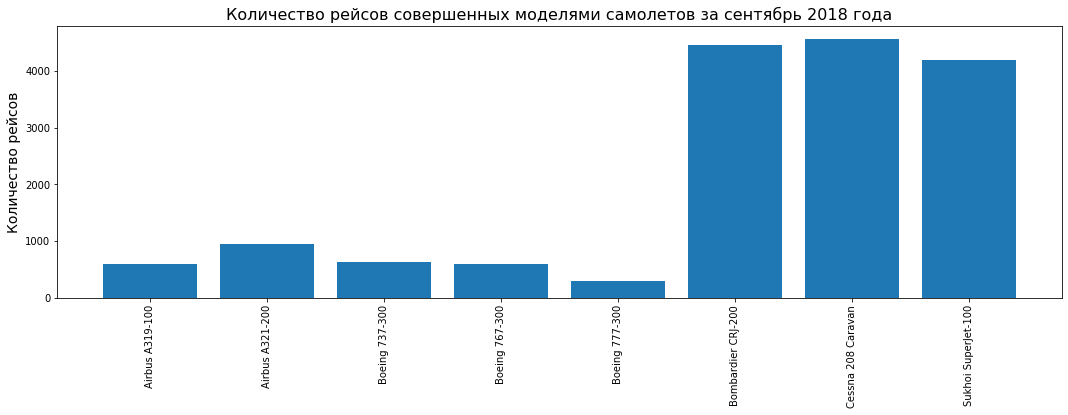

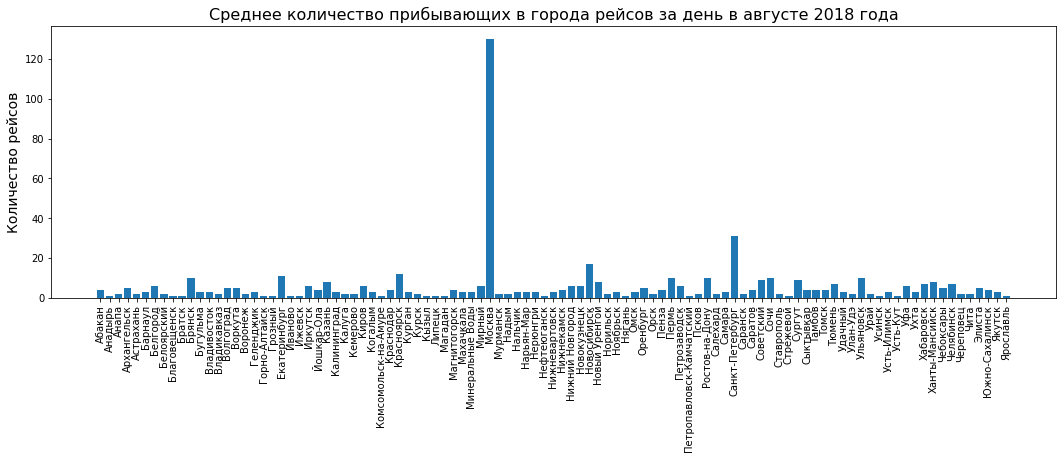

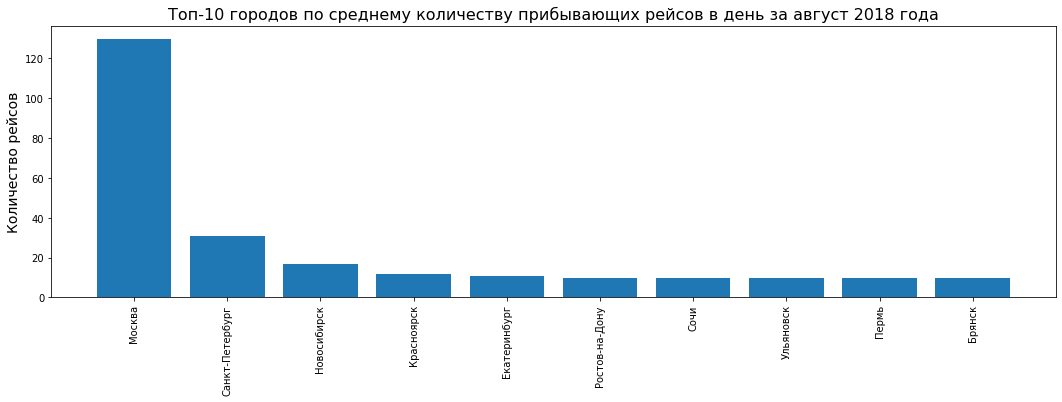

In [5]:
def plt_graph(df,title):
    plt.figure(figsize=(18,5))
    plt.bar(df[df.columns[0]],df[df.columns[1]])
    plt.title(title,fontsize=16)
    plt.ylabel('Количество рейсов',fontsize=14)
    plt.xticks(rotation=90)    
    
plt_graph(aircrafts,'Количество рейсов совершенных моделями самолетов за сентябрь 2018 года')
plt_graph(arrival_flights,'Среднее количество прибывающих в города рейсов за день в августе 2018 года')
plt_graph(arr_flights_top,'Топ-10 городов по среднему количеству прибывающих рейсов в день за август 2018 года')

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера №1

Можешь отсортировать график? Данные станут более доступны для понимания и можно будет посмотреть на аутсайдеров. 
</div>

In [6]:
display_side_by_side(
    [aircrafts.describe(),arrival_flights.describe(),arr_flights_top.describe()],
    ['Описание кол-ва рейсов по моделям самолетов','Описание ср. кол-ва прибывающих рейсов в города','Описание ср. кол-ва прибывающих рейсов в города (Топ-10)'])

,flights_amount
count,8
mean,2035.62
std,1965.2
min,300
25%,605.25
50%,795
75%,4250.25
max,4557
,average_flights
count,101


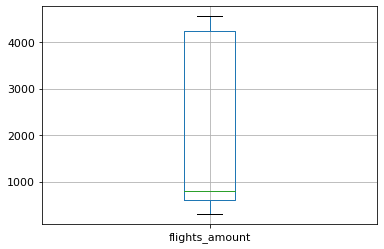

In [18]:
#Ящик с усами для количества рейсов совершенных моделями самолетов за сентябрь 2018 года.
aircrafts.boxplot(column='flights_amount', fontsize=11)

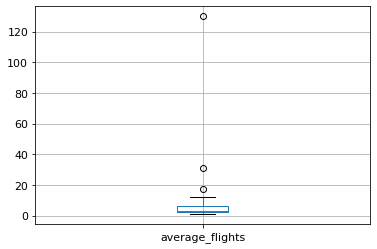

In [19]:
#Ящик с усами для среднего количество прибывающих в города рейсов в день за август 2018 года.
arrival_flights.boxplot(column='average_flights', fontsize=11)

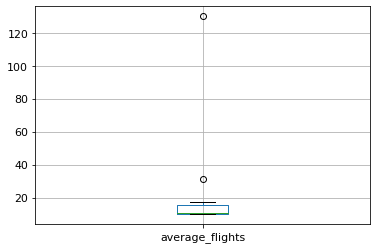

In [20]:
#Ящик с усами для топ-10 городов со средним количество прибывающих рейсов в день за август 2018 года.
arr_flights_top.boxplot(column='average_flights', fontsize=11)

<a id='step_4'></a>
### 4. Общий вывод:

<b>По данным датафрейма `aircrafts`</b><br>
Наибольшее количество рейсов за сентябрь 2018 года совершено моделями самолётов:
        1. Cessna 208 Caravan -	4557
        2. Bombardier CRJ-200 -	4446
        3. Sukhoi SuperJet-100 -   4185
    
Наименьшее количество рейсов у Boeing 777-300, который за сентябрь 2018 года сделал всего 300 рейсов.<br>
<br>
<b>По данным датафрейма `arrival_flights`</b><br>
Среди 100 городов, общее среднее количество прибываемых рейсов в города за август 2018 года равно 6 рейсам. Наименьшее количество рейсов - 1.<br>
<br>
<b>По данным датафрейма `arr_flights_top`</b><br>
Наибольшее среднее количество прибывших рейсов за день в августе 2018 года были в городах:
    1. Москва	      - 130
    2. Санкт-Петербург - 31
    3. Новосибирск	 - 17